In [2]:
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder

In [121]:
import h5py
import numpy
from collections import Counter

# Numeral experiments

In [120]:
with h5py.File('data/chorales.hdf5', "r", libver='latest') as f:
    Xtrain = f['Xtrain'].value
    ytrain = f['ytrain'].value
    Xtest = f['Xtest'].value
    ytest = f['ytest'].value

In [136]:
Counter(ytest[:, 3])[3] / float(len(ytest))

0.15548780487804878

In [130]:
Xtrain

array([[  5,  10,  13, ..., 208, 278, 294],
       [  5,  10,  13, ..., 205, 224, 279],
       [  5,  10,  13, ..., 205, 224, 279],
       ..., 
       [  3,  10,  12, ..., 202, 226, 287],
       [  3,  10,  12, ..., 202, 226, 282],
       [  3,  10,  12, ..., 201, 224, 279]], dtype=int32)

In [19]:
Xtrain[0]

array([  1,  11,  13,  16,  27, 125, 154, 161, 178, 203, 278, 294], dtype=int32)

In [20]:
ytrain

array([[ 1,  1,  3,  4],
       [ 9,  1,  3,  5],
       [ 1,  5,  2,  4],
       ..., 
       [ 1,  1,  7, 15],
       [ 3,  9, 13,  3],
       [ 3,  4,  1, 13]], dtype=int32)

In [21]:
logistic = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', C=100)

In [22]:
Xtrain = Xtrain[:, range(0,10)]
Xtest = Xtest[:, range(0,10)]

In [23]:
encoder = OneHotEncoder()
Xtrainsparse = encoder.fit_transform(Xtrain)
Xtestsparse = encoder.transform(Xtest)

In [24]:
ytrain = ytrain[:, 0]
ytest = ytest[:, 0]

In [25]:
logistic.fit(Xtrainsparse, ytrain)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0)

In [26]:
logistic.score(Xtrainsparse, ytrain)

0.36521426861383766

In [27]:
logistic.score(Xtestsparse, ytest)

0.31501272264631042

In [71]:
Counter(list(logistic.predict(Xtestsparse)))

Counter({1: 511,
         2: 46,
         3: 529,
         4: 59,
         5: 71,
         6: 5,
         7: 5,
         8: 169,
         9: 288,
         10: 67,
         11: 136,
         13: 30,
         14: 25,
         15: 3,
         18: 15,
         22: 2,
         24: 3,
         29: 1})

#### What if you predicted the most freqeuent class every time?

In [72]:
Counter(ytest)[1] / float(len(ytest))

0.20966921119592874

In [73]:
Counter(ytrain)[1] / float(len(ytrain))

0.182726837443141

So guessing the I chord every time would give you about 18% accuracy on the training set and 22% accuracy on the test set.

## Naive Bayes

In [116]:
from sklearn import naive_bayes

In [44]:
nb = naive_bayes.MultinomialNB(alpha=0.1, fit_prior=True, class_prior=None)

In [45]:
nb.fit(Xtrainsparse, ytrain)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [46]:
nb.score(Xtestsparse, ytest)

0.28193384223918577

In [47]:
nb.score(Xtrainsparse, ytrain)

0.31781182666985874

In [48]:
Counter(list(nb.predict(Xtestsparse)))

Counter({1: 405,
         2: 91,
         3: 400,
         4: 86,
         5: 141,
         6: 42,
         7: 23,
         8: 140,
         9: 283,
         10: 52,
         11: 134,
         12: 9,
         13: 36,
         14: 32,
         15: 14,
         16: 1,
         17: 7,
         18: 40,
         22: 10,
         24: 2,
         26: 1,
         28: 1,
         29: 6,
         32: 2,
         33: 2,
         34: 1,
         40: 1,
         41: 3})

## Oracle experiment

In [252]:
with h5py.File('data/chorales.hdf5', "r", libver='latest') as f:
    Xtrainor = f['Xtrain'].value
    ytrainor = f['ytrain'].value
    Xtestor = f['Xtest'].value
    ytestor = f['ytest'].value

In [253]:
Xtrainor = Xtrainor[:, range(0,11)] # The 10th column contains the correct previous harmony. 
Xtestor = Xtestor[:, range(0,11)]
allor = numpy.vstack((Xtrainor, Xtestor))
ytrainor = ytrainor[:, 0]
ytestor = ytestor[:, 0]

In [254]:
encoder = OneHotEncoder()
encoder.fit(allor)
Xtrainorsparse = encoder.transform(Xtrainor)
Xtestorsparse = encoder.transform(Xtestor)

In [255]:
logistic = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [256]:
logistic.fit(Xtrainorsparse, ytrainor)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0)

In [257]:
logistic.score(Xtrainorsparse, ytrainor)

0.45187933923868806

In [258]:
logistic.score(Xtestorsparse, ytestor)

0.40712468193384221

In [259]:
nb = naive_bayes.MultinomialNB(alpha=0.1, fit_prior=True, class_prior=None)
nb.fit(Xtrainorsparse, ytrainor)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [260]:
nb.score(Xtrainorsparse, ytrainor)

0.41225760114915011

In [261]:
nb.score(Xtestorsparse, ytestor)

0.36946564885496186

In [55]:
prevharmmin = Xtestor[:, 9].min()
prevharmax = Xtestor[:, 9].max()

In [56]:
correct = 0.
prev = None
for idx, x in enumerate(Xtestor):
    if idx > 1:
        x[10] = prev + prevharmmin - 1
    inx = encoder.transform(x)
    if logistic.predict(inx)[0] == ytestor[idx]:
        correct += 1
    prev = logistic.predict(inx)[0]
print correct / len(Xtestor)

0.304325699746


# Inversion experiments

In [95]:
# Reset data
with h5py.File('data/chorales.hdf5', "r", libver='latest') as f:
    Xtrain = f['Xtrain'].value
    ytrain = f['ytrain'].value
    Xdev = f['Xdev'].value
    ydev = f['ydev'].value
    Xtest = f['Xtest'].value
    ytest = f['ytest'].value

In [96]:
logistic = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)

In [102]:
# Provide the correct harmony
def columnToMatrix(col):
    return col.reshape(col.shape[0], 1)

Xtraininv = numpy.append(Xtrain[:, range(0,10)], columnToMatrix(ytrain[:, 0]), axis=1)
Xdevinv = numpy.append(Xdev[:, range(0,10)], columnToMatrix(ydev[:, 0]), axis=1)
Xtestinv = numpy.append(Xtest[:, range(0,10)], columnToMatrix(ytest[:, 0]), axis=1)
allXinv = numpy.vstack((Xtraininv, Xdevinv, Xtestinv))
max_index = allXinv.max()
def add_max_index(x):
    return x + max_index

f = numpy.vectorize(add_max_index)

Xtraininv[:, 10] = f(Xtraininv[:, 10])
Xdevinv[:, 10] = f(Xdevinv[:, 10])
Xtestinv[:, 10] = f(Xtestinv[:, 10])
print Xtraininv[0]
ytraininv = ytrain[:, 1]
ydevinv = ydev[:, 1]
ytestinv = ytest[:, 1]

allXinv = numpy.vstack((Xtraininv, Xdevinv, Xtestinv))
allyinv = numpy.hstack((ytraininv, ydevinv, ytestinv))


with h5py.File('data/choralesinv.hdf5', "w", libver='latest') as f:
    f.create_dataset('Xtrain', Xtraininv.shape, dtype="i", data=Xtraininv)
    f.create_dataset('Xdev', Xdevinv.shape, dtype="i", data=Xdevinv)
    f.create_dataset('Xtest', Xtestinv.shape, dtype="i", data=Xtestinv)
    f.create_dataset('ytrain', ytraininv.shape, dtype="i", data=ytraininv)
    f.create_dataset('ydev', ydevinv.shape, dtype="i", data=ydevinv)
    f.create_dataset('ytest', ytestinv.shape, dtype="i", data=ytestinv)
    f.create_dataset('Xall', allXinv.shape, dtype="i", data=allXinv)
    f.create_dataset('yall', allyinv.shape, dtype="i", data=allyinv)

print Xtraininv.shape
print Xtestinv.shape
print allXinv.shape

[  5  10  13  17  29 132 154 167 178 208 224]
(16633, 11)
(1968, 11)
(20773, 11)


In [105]:
encoder = OneHotEncoder()
encoder.fit(allXinv)
Xtraininvsparse = encoder.transform(Xtraininv)
Xtestinvsparse = encoder.transform(Xtestinv)

In [106]:
ytraininv = ytrain[:, 1]
ytestinv = ytest[:, 1]

In [107]:
logistic.fit(Xtraininvsparse, ytraininv)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0)

In [108]:
logistic.score(Xtraininvsparse, ytraininv)

0.63440149101184395

In [109]:
logistic.score(Xtestinvsparse, ytestinv)

0.63363821138211385

#### What if you just predicted the most frequent class?

In [110]:
Counter(ytraininv)[1] / float(len(ytraininv))

0.5548006974087657

In [111]:
Counter(ytestinv)[1] / float(len(ytestinv))

0.5757113821138211

In [112]:
Counter(ytestinv)

Counter({1: 1133,
         2: 392,
         3: 108,
         4: 96,
         5: 39,
         6: 16,
         7: 38,
         8: 2,
         9: 71,
         10: 35,
         11: 19,
         13: 18,
         15: 1})

In [113]:
Counter(logistic.predict(Xtestinvsparse))

Counter({1: 1508,
         2: 256,
         3: 68,
         4: 45,
         6: 13,
         7: 8,
         9: 37,
         10: 16,
         11: 13,
         13: 4})

### Naive Bayes

In [117]:
nb = naive_bayes.MultinomialNB(alpha=1, fit_prior=True, class_prior=None)
nb.fit(Xtraininvsparse, ytraininv)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [118]:
nb.score(Xtraininvsparse, ytraininv)

0.59706607346840623

In [119]:
nb.score(Xtestinvsparse, ytestinv)

0.61788617886178865

In [214]:
Counter(nb.predict(Xtestinvsparse))

Counter({1: 1236,
         2: 467,
         3: 132,
         4: 51,
         5: 1,
         6: 8,
         7: 9,
         9: 41,
         10: 8,
         11: 6,
         13: 6})

## Best performance sequentially

One method for evaluating all four harmonization subtasks (Roman numeral, inversion, alto, tenor) is to train 4 classifiers and pass the output from each as part of the input to the next. To get an upper bound on accuracy, let's create a classifier that takes as input correct decision for the first 3 subtasks.

In [303]:
# Reset data
with h5py.File('data/chorales.hdf5', "r", libver='latest') as f:
    Xtrain = f['Xtrain'].value
    ytrain = f['ytrain'].value
    Xdev = f['Xdev'].value
    ydev = f['ydev'].value
    Xtest = f['Xtest'].value
    ytest = f['ytest'].value

In [304]:
Xtrainten = numpy.hstack((Xtrain[:, range(0,10)], ytrain[:, range(0,3)]))
Xtestten = numpy.hstack((Xtest[:, range(0,10)], ytest[:, range(0,3)]))

In [305]:
def add_max_index(x):
    return x + max_index
f = numpy.vectorize(add_max_index)

In [306]:
for i in range(10, 13):
    max_index = allXten.max()
    Xtrainten[:, i] = f(Xtrainten[:, i])
    Xtestten[:, i] = f(Xtestten[:, i])
    allXten = numpy.vstack((Xtrainten, Xtestten))

In [307]:
ytrainten = ytrain[:, 3]
ytestten = ytest[:, 3]

In [308]:
print Xtrainten[0]
print ytrainten[0]

[  1  11  13  16  27 125 154 161 178 203 315 369 386]
4


In [309]:
logistic = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
encoder = OneHotEncoder()
encoder.fit(allXten)
Xtraintensparse = encoder.transform(Xtrainten)
Xtesttensparse = encoder.transform(Xtestten)

In [310]:
logistic.fit(Xtraintensparse, ytrainten)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0)

In [312]:
logistic.score(Xtraintensparse, ytrainten)

0.58516878142207329

In [313]:
logistic.score(Xtesttensparse, ytestten)

0.52926208651399487

In [314]:
Counter(logistic.predict(Xtesttensparse))

Counter({1: 218,
         2: 289,
         3: 314,
         4: 143,
         5: 54,
         6: 313,
         7: 185,
         8: 58,
         9: 35,
         10: 13,
         11: 35,
         12: 26,
         13: 32,
         14: 67,
         15: 132,
         16: 44,
         19: 6,
         20: 1})

In [315]:
Counter(ytestten)

Counter({1: 232,
         2: 318,
         3: 241,
         4: 161,
         5: 55,
         6: 272,
         7: 150,
         8: 49,
         9: 58,
         10: 8,
         11: 36,
         12: 36,
         13: 46,
         14: 69,
         15: 166,
         16: 47,
         17: 1,
         18: 3,
         19: 16,
         20: 1})

## Creating Data for 4 Sequential Classifiers

In [354]:
with h5py.File('data/chorales.hdf5', "r", libver='latest') as f:
    Xtrain = f['Xtrain'].value
    ytrain = f['ytrain'].value
    Xdev = f['Xdev'].value
    ydev = f['ydev'].value
    Xtest = f['Xtest'].value
    ytest = f['ytest'].value

In [360]:
print Xtrain[1, range(0, 10)]
print ytrain[0]

[  1  11  13  17  28 126 154 158 180 202]
[1 1 3 4]


In [335]:
print ytrain[:, 0]

[1 9 1 ..., 1 3 3]


In [402]:
def add_max_index(x):
    return x + max_index
f = numpy.vectorize(add_max_index)

# Roman numeral data
Xtrainnum, Xdevnum, Xtestnum = Xtrain[:, range(0, 10)], Xdev[:, range(0, 10)], Xtest[:, range(0, 10)]
ytrainnum, ydevnum, ytestnum = ytrain[:, 0], ydev[:, 0], ytest[:, 0]
allXnum = numpy.vstack((Xtrainnum, Xdevnum, Xtestnum))
allynum = numpy.hstack((ytrainnum, ydevnum, ytestnum))
max_index = allXnum.max()

# Inversion data
Xtraininv = numpy.hstack((Xtrainnum, ytrain[:, range(0,1)]))
Xdevinv = numpy.hstack((Xdevnum, ydev[:, range(0,1)]))
Xtestinv = numpy.hstack((Xtestnum, ytest[:, range(0,1)]))
ytraininv, ydevinv, ytestinv = ytrain[:, 1], ydev[:, 1], ytest[:, 1]
allXinv = numpy.vstack((Xtraininv, Xdevinv, Xtestinv))
max_index = allXinv.max()
Xtraininv[:, 10] = f(Xtraininv[:, 10])
Xdevinv[:, 10] = f(Xdevinv[:, 10])
Xtestinv[:, 10] = f(Xtestinv[:, 10])
allXinv = numpy.vstack((Xtraininv, Xdevinv, Xtestinv))
allyinv = numpy.hstack((ytraininv, ydevinv, ytestinv))

# Alto data
Xtrainalt = numpy.hstack((Xtraininv, ytrain[:, range(1,2)]))
Xdevalt = numpy.hstack((Xdevinv, ydev[:, range(1,2)]))
Xtestalt = numpy.hstack((Xtestinv, ytest[:, range(1,2)]))
ytrainalt, ydevalt, ytestalt = ytrain[:, 2], ydev[:, 2], ytest[:, 2]
allXalt = numpy.vstack((Xtrainalt, Xdevalt, Xtestalt))
max_index = allXalt.max()
Xtrainalt[:, 11] = f(Xtrainalt[:, 11])
Xdevalt[:, 11] = f(Xdevalt[:, 11])
Xtestalt[:, 11] = f(Xtestalt[:, 11])
allXalt = numpy.vstack((Xtrainalt, Xdevalt, Xtestalt))
allyalt = numpy.hstack((ytrainalt, ydevalt, ytestalt))

# Tenor data
Xtrainten = numpy.hstack((Xtrainalt, ytrain[:, range(2,3)]))
Xdevten = numpy.hstack((Xdevalt, ydev[:, range(2,3)]))
Xtestten = numpy.hstack((Xtestalt, ytest[:, range(2,3)]))
ytrainten, ydevten, ytestten = ytrain[:, 3], ydev[:, 3], ytest[:, 3]
allXten = numpy.vstack((Xtrainten, Xdevten, Xtestten))
max_index = allXten.max()
Xtrainten[:, 12] = f(Xtrainten[:, 12])
Xdevten[:, 12] = f(Xdevten[:, 12])
Xtestten[:, 12] = f(Xtestten[:, 12])
allXten = numpy.vstack((Xtrainten, Xdevten, Xtestten))
allyten = numpy.hstack((ytrainten, ydevten, ytestten))

print Xtrainnum[0], ytrainnum[0]
print Xtraininv[0], ytraininv[0]
print Xtrainalt[0], ytrainalt[0]
print Xtrainten[0], ytrainten[0]

print Xtrainnum.shape

print "\nINDICES"
for i in range(len(allXten[0])):
    print i, allXten[:, i].min(), allXten[:, i].max()
    


[  1  11  13  16  27 125 154 161 178 203] 1
[  1  11  13  16  27 125 154 161 178 203 224] 1
[  1  11  13  16  27 125 154 161 178 203 224 278] 3
[  1  11  13  16  27 125 154 161 178 203 224 278 295] 4
(16708, 10)

INDICES
0 1 9
1 10 11
2 12 14
3 15 17
4 18 124
5 125 153
6 154 155
7 156 177
8 178 200
9 201 223
10 224 277
11 278 292
12 293 314


In [403]:
with h5py.File('data/choralesseq.hdf5', "w", libver='latest') as f:
    f.create_dataset('Xtrainnum', Xtrainnum.shape, dtype="i", data=Xtrainnum)
    f.create_dataset('Xdevnum', Xdevnum.shape, dtype="i", data=Xdevnum)
    f.create_dataset('Xtestnum', Xtestnum.shape, dtype="i", data=Xtestnum)
    f.create_dataset('ytrainnum', ytrainnum.shape, dtype="i", data=ytrainnum)
    f.create_dataset('ydevnum', ydevnum.shape, dtype="i", data=ydevnum)
    f.create_dataset('ytestnum', ytestnum.shape, dtype="i", data=ytestnum)
    f.create_dataset('Xallnum', allXnum.shape, dtype="i", data=allXnum)
    f.create_dataset('yallnum', allynum.shape, dtype="i", data=allynum)
    f.create_dataset('Xtraininv', Xtraininv.shape, dtype="i", data=Xtraininv)
    f.create_dataset('Xdevinv', Xdevinv.shape, dtype="i", data=Xdevinv)
    f.create_dataset('Xtestinv', Xtestinv.shape, dtype="i", data=Xtestinv)
    f.create_dataset('ytraininv', ytraininv.shape, dtype="i", data=ytraininv)
    f.create_dataset('ydevinv', ydevinv.shape, dtype="i", data=ydevinv)
    f.create_dataset('ytestinv', ytestinv.shape, dtype="i", data=ytestinv)
    f.create_dataset('Xallinv', allXinv.shape, dtype="i", data=allXinv)
    f.create_dataset('yallinv', allyinv.shape, dtype="i", data=allyinv)
    f.create_dataset('Xtrainalt', Xtrainalt.shape, dtype="i", data=Xtrainalt)
    f.create_dataset('Xdevalt', Xdevalt.shape, dtype="i", data=Xdevalt)
    f.create_dataset('Xtestalt', Xtestalt.shape, dtype="i", data=Xtestalt)
    f.create_dataset('ytrainalt', ytrainalt.shape, dtype="i", data=ytrainalt)
    f.create_dataset('ydevalt', ydevalt.shape, dtype="i", data=ydevalt)
    f.create_dataset('ytestalt', ytestalt.shape, dtype="i", data=ytestalt)
    f.create_dataset('Xallalt', allXalt.shape, dtype="i", data=allXalt)
    f.create_dataset('yallalt', allyalt.shape, dtype="i", data=allyalt)
    f.create_dataset('Xtrainten', Xtrainten.shape, dtype="i", data=Xtrainten)
    f.create_dataset('Xdevten', Xdevten.shape, dtype="i", data=Xdevten)
    f.create_dataset('Xtestten', Xtestten.shape, dtype="i", data=Xtestten)
    f.create_dataset('ytrainten', ytrainten.shape, dtype="i", data=ytrainten)
    f.create_dataset('ydevten', ydevten.shape, dtype="i", data=ydevten)
    f.create_dataset('ytestten', ytestten.shape, dtype="i", data=ytestten)
    f.create_dataset('Xallten', allXten.shape, dtype="i", data=allXten)
    f.create_dataset('yallten', allyten.shape, dtype="i", data=allyten)

### Sklearn on the full dataset

In [4]:
with h5py.File('data/chorales.hdf5', "r", libver='latest') as f:
    Xtrain = f['Xtrain'].value
    ytrain = f['ytrain'].value
    Xdev = f['Xdev'].value
    ydev = f['ydev'].value
    Xtest = f['Xtest'].value
    ytest = f['ytest'].value

Xall = numpy.vstack((Xtrain, Xdev, Xtest))
yall = numpy.vstack((ytrain, ydev, ytest))

In [11]:
print ytrain[:, 0].max()
print ydev[:, 0].max()
print ytest[:, 0].max()
print yall[:, 0].max()

54
52
42
54


In [13]:
map(tuple, ytrain)

[(1, 1, 7, 6),
 (1, 1, 7, 2),
 (3, 1, 2, 2),
 (18, 1, 11, 3),
 (3, 1, 11, 3),
 (3, 7, 7, 15),
 (39, 13, 5, 16),
 (21, 13, 4, 6),
 (4, 1, 6, 6),
 (11, 3, 4, 6),
 (4, 1, 7, 6),
 (7, 1, 11, 7),
 (18, 7, 11, 9),
 (3, 12, 11, 9),
 (18, 10, 11, 7),
 (18, 1, 11, 3),
 (3, 1, 1, 13),
 (1, 2, 13, 2),
 (6, 2, 7, 6),
 (1, 1, 7, 3),
 (3, 1, 7, 3),
 (3, 1, 7, 8),
 (1, 6, 15, 4),
 (2, 6, 11, 16),
 (10, 1, 7, 16),
 (3, 3, 7, 6),
 (13, 3, 2, 10),
 (34, 3, 1, 9),
 (1, 2, 4, 9),
 (46, 4, 6, 16),
 (6, 7, 12, 6),
 (4, 1, 12, 10),
 (18, 3, 8, 9),
 (15, 1, 8, 9),
 (1, 3, 5, 9),
 (8, 5, 5, 16),
 (8, 2, 7, 16),
 (8, 10, 7, 16),
 (8, 10, 7, 6),
 (1, 1, 7, 6),
 (1, 1, 6, 7),
 (9, 1, 4, 7),
 (11, 2, 7, 2),
 (13, 1, 2, 2),
 (9, 1, 11, 3),
 (9, 1, 1, 3),
 (8, 2, 7, 1),
 (10, 6, 2, 2),
 (11, 1, 5, 2),
 (12, 2, 4, 6),
 (10, 1, 5, 6),
 (2, 1, 6, 7),
 (9, 1, 6, 3),
 (8, 2, 7, 3),
 (14, 3, 2, 8),
 (3, 1, 11, 3),
 (9, 1, 6, 7),
 (9, 1, 4, 7),
 (11, 2, 7, 2),
 (13, 1, 2, 2),
 (9, 1, 11, 3),
 (9, 1, 1, 3),
 (8, 2, 7, 1),
 

In [14]:
from ordered_set import OrderedSet
# Convert ytrainTree into a list of indices of occurring harmonizations.
harmonizations = {}
counter = 1

ytraintups, ydevtups, ytesttups = map(tuple, ytrain), map(tuple, ydev), map(tuple, ytest)
yalltups = ytraintups + ydevtups + ytesttups
yunique = list(OrderedSet(yalltups))
tounique = lambda x: yunique.index(x) + 1
ytrainunique, ydevunique, ytestunique = map(tounique, ytraintups), map(tounique, ydevtups), map(tounique, ytesttups)
ytrainunique, ydevunique, ytestunique = numpy.array(ytrainunique), numpy.array(ydevunique), numpy.array(ytestunique)

with h5py.File('data/chorales_sm.hdf5', "w", libver='latest') as f:
    f.create_dataset('ytrainunique', ytrainunique.shape, dtype="i", data=ytrainunique)
    f.create_dataset('ydevunique', ydevunique.shape, dtype="i", data=ydevunique)
    f.create_dataset('ytestunique', ytestunique.shape, dtype="i", data=ytestunique)

print ytrainunique.shape
print ydevunique.shape
print ytestunique.shape

(16633,)
(2172,)
(1968,)


In [26]:
Xtestvetted = []
ytestvetted = []
for idx, x in enumerate(ytestunique):
    if x in ytrainunique:
        Xtestvetted.append(Xtest[idx])
        ytestvetted.append(x)
Xtestvetted = numpy.matrix(Xtestvetted)
ytestvetted = numpy.array(ytestvetted)

In [27]:
logistic = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1000)
encoder = OneHotEncoder()
encoder.fit(Xall[:, range(0, 10)])
Xtrainsparse = encoder.transform(Xtrain[:, range(0,10)])
Xtestsparse = encoder.transform(Xtestvetted[:, range(0,10)])

In [28]:
logistic.fit(Xtrainsparse, ytrainunique)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0)

In [29]:
logistic.score(Xtrainsparse, ytrainunique)

0.81103829736066857

In [32]:
logistic.score(Xtestsparse, ytestvetted)

0.21741815935762818

In [33]:
Xtestsparseorig = encoder.transform(Xtest[:, range(0,10)])
logistic.score(Xtestsparseorig, ytestunique)

0.17886178861788618

In [113]:
Counter(logistic.predict(Xtestsparse))

Counter({1: 2,
         6: 8,
         7: 1,
         13: 13,
         14: 15,
         15: 1,
         17: 4,
         18: 1,
         22: 35,
         23: 1,
         26: 4,
         31: 3,
         32: 6,
         36: 4,
         37: 14,
         38: 6,
         39: 5,
         40: 1,
         43: 2,
         46: 4,
         47: 2,
         48: 8,
         56: 1,
         57: 3,
         58: 23,
         59: 1,
         60: 8,
         67: 5,
         69: 1,
         70: 2,
         73: 4,
         78: 8,
         79: 10,
         81: 1,
         88: 41,
         96: 3,
         97: 36,
         98: 19,
         100: 34,
         101: 2,
         102: 2,
         103: 4,
         106: 17,
         108: 6,
         110: 2,
         113: 5,
         118: 3,
         119: 1,
         122: 18,
         123: 4,
         124: 55,
         125: 14,
         130: 3,
         131: 5,
         132: 3,
         133: 1,
         136: 1,
         137: 1,
         143: 1,
         144: 12,
      

In [91]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def plotNLLandConfidence(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    formatted = map(lambda x: x[:-2] if '\t\n' in x else x[:-1], lines)
    formatted = [map(float, x.split('\t')) for x in formatted]
    nll = [x[0] for x in formatted]
    per = [x[1] for x in formatted]
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    fig.tight_layout()
    ax[0].hist(per)
    ax[0].set_xlabel("Probability assigned to the correct decision")
    ax[1].hist(nll)
    ax[1].set_xlabel("NLL of the parameters given each outcome in the test set")
    plt.show()

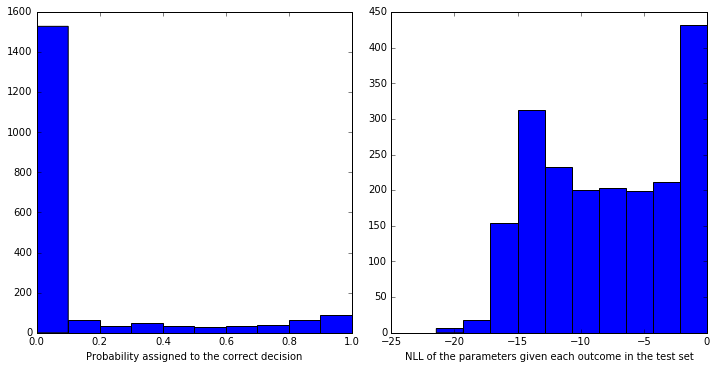

In [92]:
plotNLLandConfidence("smerror.txt")

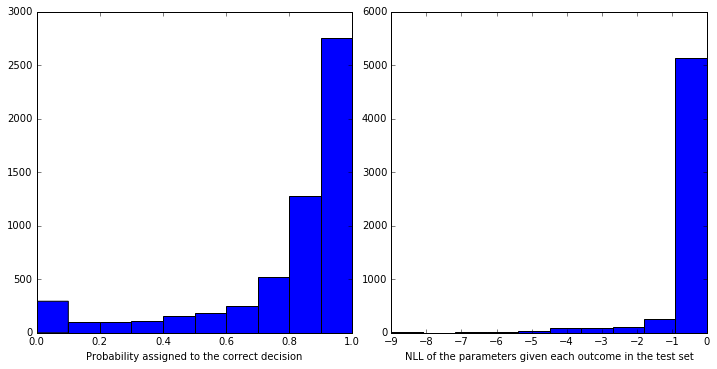

In [94]:
plotNLLandConfidence("smerror_train.txt")